**Recommendation system for Netflix Prize Dataset using SVD**

**Importing necessary Libraries for Data loading and Manipulation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Importing Data from Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
#Shape of the Dataset
netflix_dataset.shape

(24058263, 2)

In [5]:
# Head of Dataset

netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [6]:
#Getting Movie Count , Null Rating is in row of Customer Id

movie_count = netflix_dataset.isnull().sum().iloc[1]

movie_count
#Movie Count = 4499

4499

In [7]:
#Customer count after substratring Movie count

customer_count = netflix_dataset['Cust_Id'].nunique() - movie_count
customer_count

#Customer Count = 470758

470758

In [8]:
#Rating Count after substratring Movie count

rating_count = netflix_dataset['Cust_Id'].count()- movie_count
rating_count

#Rating Count = 24053764

24053764

In [9]:
#Grouping on basis of rating to get individual rating count/ distribution of rating

stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


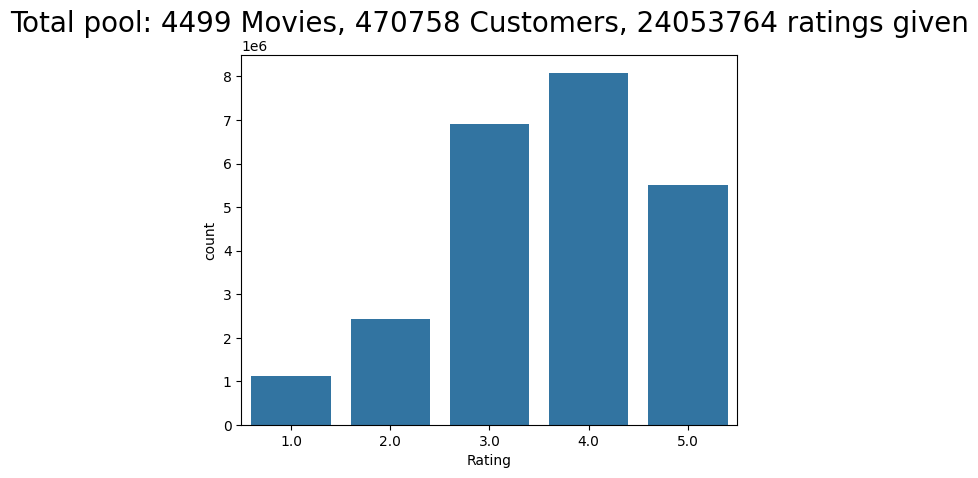

In [10]:
sns.barplot(x=stars.index, y='count', data=stars)
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.show()

In [11]:
df =netflix_dataset.copy()

In [12]:
#Getting Movie Ids from customer id by using loop and appending it in seperate column

current_movie_id = None
movie_ids = []

for cust_id in df['Cust_Id']:
    if ':' in cust_id:
      current_movie_id = int(cust_id.replace(':', ''))
    movie_ids.append(current_movie_id)


df['movie_Id'] = movie_ids

df = df[df['Rating'].notna()]

In [13]:
movie_ids

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [14]:
df = df.reset_index().drop("index", axis = 1)

In [15]:
#This is manipulated dataset which we are going to use in modeling

df

,Cust_Id,Rating,movie_Id
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1
4,823519,3.0,1
...,...,...,...
24053759,2591364,2.0,4499
24053760,1791000,2.0,4499
24053761,512536,5.0,4499
24053762,988963,3.0,4499


In [16]:
netflix_dataset = df

In [17]:
netflix_dataset.head()

,Cust_Id,Rating,movie_Id
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1
4,823519,3.0,1


**Data Cleaning**

In [18]:
#For getting count and average of rating and grouping on movie ids

f = [ 'count' , 'mean']

In [19]:
dataset_movie_summary=netflix_dataset.groupby('movie_Id')['Rating'].agg(f)
dataset_movie_summary

,count,mean
movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [20]:
#Now setting Benchmark to avoid false rating and misleading
# Benchmark is to getting genuine rating

#Benchmark for minumum number of rating per movie ,  all below this number will be added to drop list

mv_benchmark =dataset_movie_summary['count'].quantile(0.7)
mv_benchmark= round(mv_benchmark)
mv_benchmark

1799

In [21]:
dataset_movie_summary['count']

,count
movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [22]:
#Movies below benchmark

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < mv_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='movie_Id', length=3149)

In [23]:
dataset_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
10,49,3.346939
1000004,1,5.000000
1000027,30,4.300000
1000033,101,3.316832
1000035,20,4.400000
...,...,...
999964,48,4.062500
999972,35,4.057143
999977,14,3.714286


In [24]:
#Benchmark for minumum number of rating per Customer Id, all below this number will be added to drop list

cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7))
cust_benchmark

52

In [25]:
#Customers below benchmark

drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='Cust_Id', length=327300)

In [26]:
#Dropping data which is below our benchmark

netflix_dataset=netflix_dataset[~netflix_dataset['movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

#After Dropping we end up with 17337458 datapoints

After the triming, the shape is: (17337458, 3)


In [27]:
netflix_dataset.head()


,Cust_Id,Rating,movie_Id
693,712664,5.0,3
694,1331154,4.0,3
695,2632461,3.0,3
696,44937,5.0,3
697,656399,4.0,3


In [28]:
#Loading Dataset with Movie names and Genres of movies

df_title = pd.read_csv("/content/drive/MyDrive/movies_split_genres.csv",  encoding='ISO-8859-1' )

#df_title.set_index('movie_Id', inplace=True)

**Building Recommendation Model using SVD**

In [29]:
df_title.rename(columns={'movieId':'movie_Id'}, inplace=True)
df_title.head()

,movie_Id,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy


In [30]:
#Importing Libraries for Modeling

!pip install scikit-surprise

In [31]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [32]:
#loading Reader library
reader = Reader()

#taking 100000 rows
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'movie_Id', 'Rating']][:100000], reader)

#Using SVD algorithm
svd = SVD()

#Calculate RMSE AND MAE for SVD
cross_validate(svd, data, measures=['RMSE', 'MAE'],  verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9984  1.0027  0.9984  1.0001  0.9917  0.9983  0.0037  
MAE (testset)     0.7882  0.7895  0.7862  0.7864  0.8016  0.7904  0.0057  
Fit time          2.36    5.09    4.33    5.63    1.76    3.83    1.52    
Test time         0.42    0.76    0.74    0.11    0.11    0.43    0.29    


{'test_rmse': array([0.99838526, 1.0027351 , 0.99840444, 1.00005182, 0.99167424]),
 'test_mae': array([0.7882044 , 0.78950246, 0.78620899, 0.78639745, 0.80157002]),
 'fit_time': (2.359858751296997,
  5.085229396820068,
  4.327415704727173,
  5.629387855529785,
  1.7596392631530762),
 'test_time': (0.4245309829711914,
  0.7605466842651367,
  0.7410156726837158,
  0.10594606399536133,
  0.11299729347229004)}

In [33]:
netflix_dataset.head()

,Cust_Id,Rating,movie_Id
693,712664,5.0,3
694,1331154,4.0,3
695,2632461,3.0,3
696,44937,5.0,3
697,656399,4.0,3


In [34]:
#changing data type to integer
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)
netflix_dataset['movie_Id'] = netflix_dataset['movie_Id'].astype(int)

In [35]:
#To Find All movies rated 5 star by user with user id 712664
user_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating'] == 5.0)]
user_712664=user_712664.set_index('movie_Id')
user_712664=user_712664.join(df_title)['title']
user_712664.head()


,title
movie_Id,
3,Toy Story (1995)
79,Wings of Courage (1995)
175,Nico Icon (1995)
199,Dunston Checks In (1996)
241,Muppet Treasure Island (1996)


In [36]:

#df_title.rename(columns={'Movie_Id':'movie_Id'}, inplace=True)
df_title

,movie_Id,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
54401,131258,The Pirates (2014),Adventure
54402,131260,Rentun Ruusu (2001),(no genres listed)
54403,131262,Innocence (2014),Adventure
54404,131262,Innocence (2014),Fantasy


In [37]:
user_712664=df_title.copy()
user_712664

,movie_Id,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
54401,131258,The Pirates (2014),Adventure
54402,131260,Rentun Ruusu (2001),(no genres listed)
54403,131262,Innocence (2014),Adventure
54404,131262,Innocence (2014),Fantasy


In [38]:
#user_712664=user_712664.reset_index()
#user_712664

In [39]:
#dropping less no. movie rating
user_712664 = user_712664[user_712664['movie_Id'].isin(drop_movie_list)]
user_712664

,movie_Id,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
...,...,...,...
8805,4497,Dead Heat (1988),Sci-Fi
8806,4498,"Dead Pool, The (1988)",Action
8807,4498,"Dead Pool, The (1988)",Crime
8808,4498,"Dead Pool, The (1988)",Thriller


In [40]:
#Predicting rating for user
user_712664['Estimate_Score'] = user_712664['movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('movie_Id', axis=1)

<ipython-input-40-991ceca60d89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score'] = user_712664['movie_Id'].apply(lambda x: svd.predict(712664, x).est)


In [41]:
#sorting predications in descending order
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664.head(10))

                                                  title     genres  \
0                                      Toy Story (1995)  Adventure   
5881                                    Sparrows (1926)      Drama   
5880                    Someone to Watch Over Me (1987)   Thriller   
5879                    Someone to Watch Over Me (1987)      Crime   
5878                    Someone to Watch Over Me (1987)     Action   
5873                         Sydney (Hard Eight) (1996)   Thriller   
5872                         Sydney (Hard Eight) (1996)      Drama   
5871                         Sydney (Hard Eight) (1996)      Crime   
5870  Fistful of Dollars, A (Per un pugno di dollari...    Western   
5869  Fistful of Dollars, A (Per un pugno di dollari...     Action   

      Estimate_Score  
0           3.604637  
5881        3.604637  
5880        3.604637  
5879        3.604637  
5878        3.604637  
5873        3.604637  
5872        3.604637  
5871        3.604637  
5870        3.604637  

In [42]:
#Getting whole data to find best and worst rated movie genres
Whole_data = pd.merge(df, df_title, on='movie_Id', how='inner')
Whole_data.drop(['Cust_Id'],axis=1,inplace=True)
Whole_data.head()

,Rating,movie_Id,title,genres
0,3.0,1,Toy Story (1995),Adventure
1,3.0,1,Toy Story (1995),Animation
2,3.0,1,Toy Story (1995),Children
3,3.0,1,Toy Story (1995),Comedy
4,3.0,1,Toy Story (1995),Fantasy


**Find out the list of most popular and liked genre**

In [48]:
genre_popularity = Whole_data.groupby('genres')['Rating'].agg(['mean', 'count'])
genre_popularity = genre_popularity.sort_values('mean',  ascending=False)
print(genre_popularity.head(10))


               mean    count
genres                      
IMAX       3.826358    24994
Musical    3.734475  1065204
Horror     3.733749  2646909
Animation  3.709967   630553
Adventure  3.681438  2267227
Children   3.661377  1524413
Western    3.645396   473988
Fantasy    3.643811  1097724
Sci-Fi     3.614410  1477581
Romance    3.606007  3862361


In [50]:
#Find what Genre Movies have received the best and worst ratings based on User Rating.

# Group the data by genre and calculate the average rating for each genre
genre_ratings = Whole_data.groupby('genres')['Rating'].mean().sort_values(ascending=False)

# Print the top 5 best rated genres
print("Top 5 Best Rated Genres:")
print(genre_ratings.head(5))

# Print the top 5 worst rated genres
print("\nTop 5 Worst Rated Genres:")
print(genre_ratings.tail(5))


Top 5 Best Rated Genres:
genres
IMAX         3.826358
Musical      3.734475
Horror       3.733749
Animation    3.709967
Adventure    3.681438
Name: Rating, dtype: float64

Top 5 Worst Rated Genres:
genres
Thriller       3.544725
Crime          3.539030
Mystery        3.530431
War            3.528331
Documentary    3.513763
Name: Rating, dtype: float64
